In [45]:
import pandas as pd
estudiantes='estudiantes.csv'
df=pd.read_csv(estudiantes)
df

,ID,SEXO,PAIS,ESTUDIOS
0,1,H,ESPAÑA,MEDICINA
1,2,H,PORTUGAL,INFORMATICA
2,3,M,FRANCIA,ITI
3,4,M,ESPAÑA,MAGISTERIO
4,5,H,ITALIA,MEDICINA
5,6,H,FRANCIA,MEDICINA
6,7,H,ESPAÑA,INFORMATICA
7,8,M,PORTUGAL,ITI
8,9,M,ITALIA,INFORMATICA
9,10,M,ITALIA,MAGISTERIO


In [46]:
# Muestra el nombre de las columnas
df.columns

Index(['ID', 'SEXO', 'PAIS', 'ESTUDIOS'], dtype='object')

In [47]:
# Muestra la información del tipo de dato de cada columna y el numero de celdas del dataframe 
df.info()
df.size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        10 non-null     int64 
 1   SEXO      10 non-null     object
 2   PAIS      10 non-null     object
 3   ESTUDIOS  10 non-null     object
dtypes: int64(1), object(3)
memory usage: 448.0+ bytes


40

In [48]:
#Pasa las columnas object a categoricas
df['SEXO']=pd.Categorical(df['SEXO'])
df['PAIS']=pd.Categorical(df['PAIS'])
df['ESTUDIOS']=pd.Categorical(df['ESTUDIOS'])

In [49]:
#Pasa una columna categorica de dos opciones a columnas dummy y elimina dicha columna categorica
sexo_dummy= pd.get_dummies(df['SEXO'], prefix="SEXO")
df= pd.concat([df,sexo_dummy], axis=1)
df= df.drop(['SEXO'], axis=1)

In [50]:
df

,ID,PAIS,ESTUDIOS,SEXO_H,SEXO_M
0,1,ESPAÑA,MEDICINA,1,0
1,2,PORTUGAL,INFORMATICA,1,0
2,3,FRANCIA,ITI,0,1
3,4,ESPAÑA,MAGISTERIO,0,1
4,5,ITALIA,MEDICINA,1,0
5,6,FRANCIA,MEDICINA,1,0
6,7,ESPAÑA,INFORMATICA,1,0
7,8,PORTUGAL,ITI,0,1
8,9,ITALIA,INFORMATICA,0,1
9,10,ITALIA,MAGISTERIO,0,1


In [51]:
#Codifica una columna categorica de mas de dos opciones mediante cat codes.
df['PAIS']=df['PAIS'].cat.codes
df

,ID,PAIS,ESTUDIOS,SEXO_H,SEXO_M
0,1,0,MEDICINA,1,0
1,2,3,INFORMATICA,1,0
2,3,1,ITI,0,1
3,4,0,MAGISTERIO,0,1
4,5,2,MEDICINA,1,0
5,6,1,MEDICINA,1,0
6,7,0,INFORMATICA,1,0
7,8,3,ITI,0,1
8,9,2,INFORMATICA,0,1
9,10,2,MAGISTERIO,0,1


In [52]:
import numpy as np
from sklearn.preprocessing import LabelEncoder 

In [53]:
#Codifica la otra columna categorica de mas de dos opciones mediante LabelEncoder
label=LabelEncoder()
df['ESTUDIOS']=label.fit_transform(df['ESTUDIOS'])
df

,ID,PAIS,ESTUDIOS,SEXO_H,SEXO_M
0,1,0,3,1,0
1,2,3,0,1,0
2,3,1,1,0,1
3,4,0,2,0,1
4,5,2,3,1,0
5,6,1,3,1,0
6,7,0,0,1,0
7,8,3,1,0,1
8,9,2,0,0,1
9,10,2,2,0,1


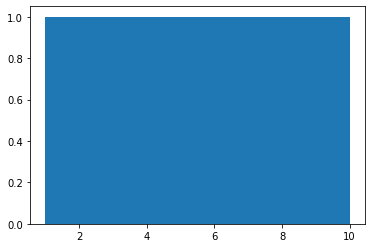

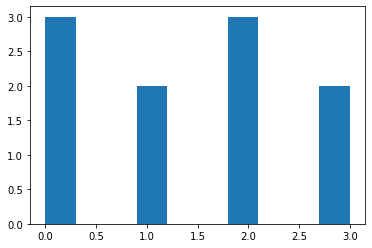

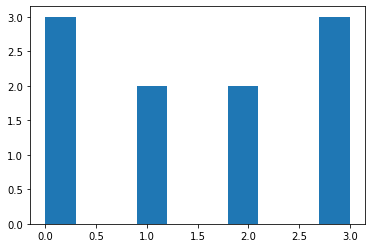

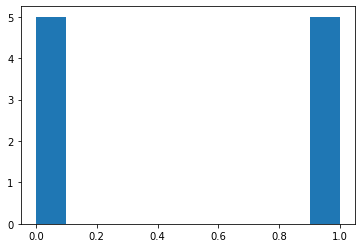

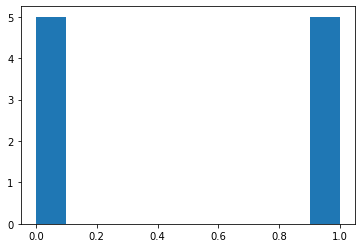

In [54]:
#Muestra el histograma de cada columnas
import seaborn as sns 
import matplotlib.pyplot as plt
for columna in df:
    plt.hist(df[columna])
    plt.show()

In [55]:
#Realiza el test de Shapiro de cada columnas
from scipy.stats import shapiro
for columna_numerica  in df.columns:
    # Aplicamos shapiro
    stat, p = shapiro(df[columna_numerica])
    
    print('Valor de test=%.3f, p-value=%.3f' % (stat, p))
    # Interpretación de resultados
    alpha = 0.05
    if p > alpha:
        print('La variable ',columna_numerica, ' proviene de una distribución normal (no rechazamos H0) \n')
    else:
        print('La variable ',columna_numerica, ' NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 \n')

Valor de test=0.970, p-value=0.892
La variable  ID  proviene de una distribución normal (no rechazamos H0) 

Valor de test=0.878, p-value=0.124
La variable  PAIS  proviene de una distribución normal (no rechazamos H0) 

Valor de test=0.852, p-value=0.061
La variable  ESTUDIOS  proviene de una distribución normal (no rechazamos H0) 

Valor de test=0.655, p-value=0.000
La variable  SEXO_H  NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.655, p-value=0.000
La variable  SEXO_M  NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 



In [56]:
#Normaliza mediante Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()



df = scaler.fit_transform(df)
df

array([[-1.5666989 , -1.25723711,  1.2456822 ,  1.        , -1.        ],
       [-1.21854359,  1.43684242, -1.2456822 ,  1.        , -1.        ],
       [-0.87038828, -0.3592106 , -0.4152274 , -1.        ,  1.        ],
       [-0.52223297, -1.25723711,  0.4152274 , -1.        ,  1.        ],
       [-0.17407766,  0.53881591,  1.2456822 ,  1.        , -1.        ],
       [ 0.17407766, -0.3592106 ,  1.2456822 ,  1.        , -1.        ],
       [ 0.52223297, -1.25723711, -1.2456822 ,  1.        , -1.        ],
       [ 0.87038828,  1.43684242, -0.4152274 , -1.        ,  1.        ],
       [ 1.21854359,  0.53881591, -1.2456822 , -1.        ,  1.        ],
       [ 1.5666989 ,  0.53881591,  0.4152274 , -1.        ,  1.        ]])